This notebook describes mhc coverage in initial dataset (which was used to train most available predictors)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/bdata.csv")
df.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas
0,cow,BoLAHD6,9,TBD,ALFYKDGKL,=,1.000000
1,cow,BoLAHD6,9,TBD,ALYEKKLAL,=,1.000000
2,cow,BoLAHD6,9,TBD,AMKDRFQPL,=,4.521706
3,cow,BoLAHD6,9,TBD,AQRELFFTL,=,1.000000
4,cow,BoLAHD6,9,TBD,FMKVKFEAL,=,1.576747


In [3]:
df["peptide_length"].describe()

count    179692.000000
mean          9.249293
std           0.714603
min           8.000000
25%           9.000000
50%           9.000000
75%           9.000000
max          30.000000
Name: peptide_length, dtype: float64

In [4]:
df = df[df['species']=='human']
df.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas
9873,human,HLAA0101,8,TBD,AEMKTDAA,=,29766.651099
9874,human,HLAA0101,8,TBD,AFPTSCHM,>,70422.535211
9875,human,HLAA0101,8,TBD,AQFSPQYL,>,87719.298246
9876,human,HLAA0101,8,TBD,ASFCGSPY,=,51.400000
9877,human,HLAA0101,8,TBD,CCFHCQVC,>,87719.298246


In [5]:
df.mhc.value_counts().describe()

count      118.000000
mean      1287.567797
std       1947.356141
min          1.000000
25%         36.000000
50%        342.000000
75%       1753.000000
max      11920.000000
Name: mhc, dtype: float64

In [6]:
freq = df.mhc.value_counts()
freq.head()

HLAA0201    11920
HLAA0301     7089
HLAA0203     6302
HLAA1101     6255
HLAA3101     5628
Name: mhc, dtype: int64

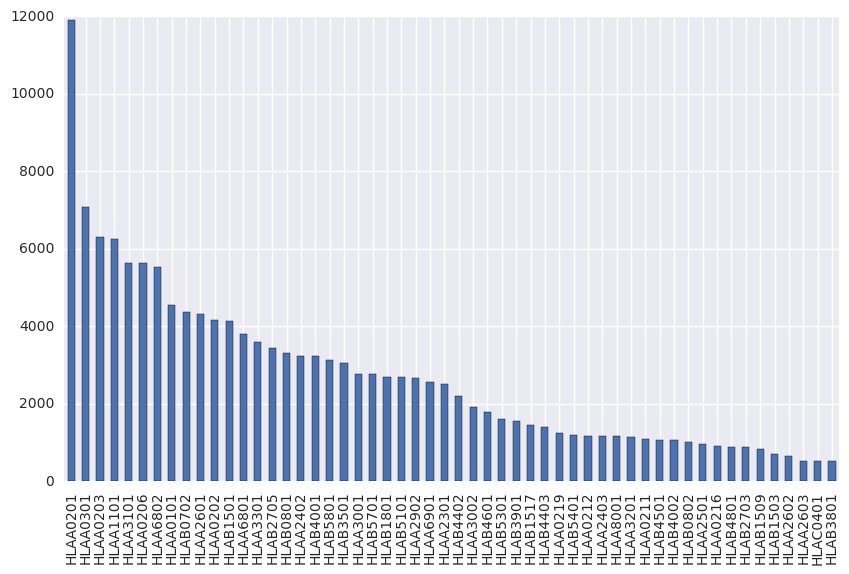

In [7]:
ax = plt.figure(figsize=(10, 6))
freq[freq>500].plot(kind='bar')

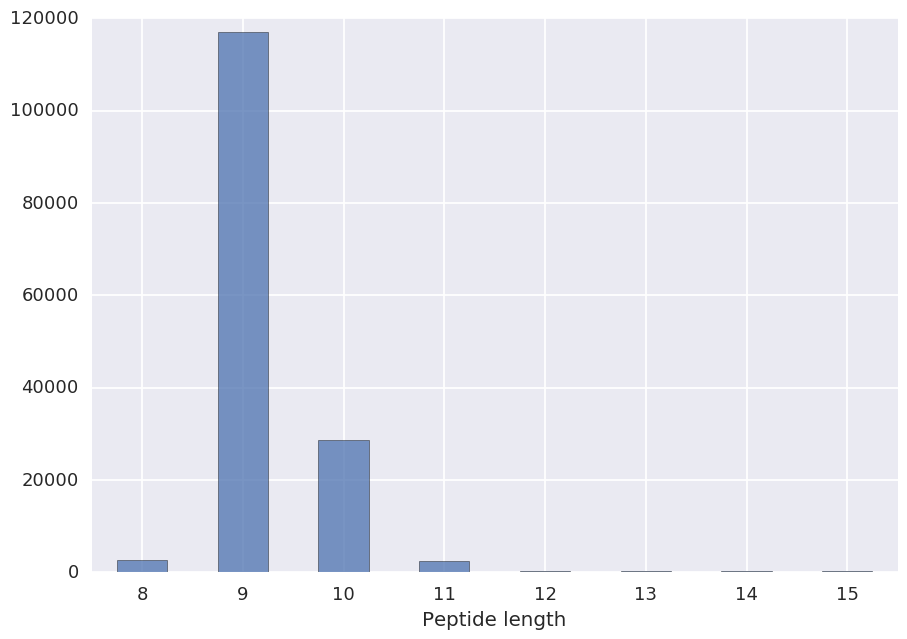

In [8]:
with sns.plotting_context("talk"):
    # df.sort_values(by="peptide_length")["peptide_length"].value_counts().plot(kind="bar")
    plot = df["peptide_length"].value_counts().sort_index().head(n=8).plot.bar(alpha=0.75, rot=0)
    fig = plot.get_figure()
    plt.xlabel('Peptide length')
    fig.savefig("output/MHC_length_bias.png")